<a href="https://colab.research.google.com/github/eraldoribeiro/homogeneousCoordinates/blob/main/code/homogeneousCoords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homogeneous coordinates

Linear geometric transformations can be written as concise equations using 
matrix multiplication. For instance, let the following transformation maps a 
vector ${\bf x}$ onto a vector ${\bf x}^\prime$: 

$${\bf x}^\prime = SR\,{\bf x},$$

where $S$ is a scaling matrix and $R$ is a rotation matrix. $S$ and $R$ are 
linear transformations, and so is the composition $SR$. 

This compact form of the transformation matrix simplifies both its computation 
and notation. For example, we can change the order in which the transformations 
are applied by simply changing the order of multiplication, i.e.:  

$${\bf x}^{\prime\prime} = RS\,{\bf x},$$

or we can calculate the inverse transformation directly, i.e., the inverse 
of ${\bf x}^\prime = SR\,{\bf x}$ can be written as: 

${\bf x} = (SR)^{-1}\,{\bf x}^\prime = (R^{-1}S^{-1})\,{\bf x}^\prime$.

However, this compact notation breaks if the transformation includes a translation 
(i.e., for affine transformations). An affine transformation includes a linear 
component and a translation component and is written as follows:

${\bf x}^\prime = A{\bf x} + {\bf t} $.  

In 2-D, the matrix form of the affine transformation can be written explicitly 
as: 

$$\left[\begin{array}{c}		x^\prime \\		y^\prime\end{array}\right] = \left[\begin{array}{c}		
a_1 & a_2 \\		a_3 & a_4\end{array}\right]\left[\begin{array}{c}    x \\        
y\end{array}\right]+\left[\begin{array}{c}    t_x \\        t_y\end{array}\right]$$

Now, the transformation notation combines a multiplication followed by a addition. 
It can no longer be represented by a single matrix or by multiplications only 
(i.e., we have to mix multiplication and addition).  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#from shapely.geometry.polygon import Polygon
#import shapely.ops as so
#import geopandas as gpd
#from shapely import MultiPolygon
#from shapely.plotting import plot_polygon, plot_points

### Creating a (helper) function that displays two shapes 
The example described in this code will display the two shapes so we can compare the original shape and its transformed version.
The following function displays the two shapes on a single axis for visualization purposes. 

In [2]:
def plotTwoPolygons(X1: np.ndarray = np.array([]), 
                    X2: np.ndarray = np.array([]),
                    plot_title: str = None):
    """
    Plots two polygons. It is just a helper function to show the 
    difference between the original 2-D shape and its transformed 
    version after some linear transformation. 

    Parameters
    ----------
    X1: numpy.ndarray, shape=(2, N)
        2 x N array containing the (x, y) coordinates of a polygon
        
    X2: numpy.ndarray, shape=(2, N)
        2 x N array containing the (x, y) coordinates of a polygon

    Returns
    -------
    Nothing.

    """
     
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(-1,10)
    ax.set_ylim(-1,10)
    plt.grid(True)

    if X1.size != 0:
        poly1 = mpl.patches.Polygon(X1.transpose(),fc='blue',alpha=0.5,zorder=1,linewidth=2,edgecolor='k')
        ax.add_patch(poly1)
        ax.plot(X1[0,:], X1[1,:], 'bo')  # plot x and y using circle markers
       
        
    if X2.size != 0: 
        poly2 = mpl.patches.Polygon(X2.transpose(),fc='red',alpha=0.5,zorder=99,linewidth=2,edgecolor='k')
        ax.add_patch(poly2)
        ax.plot(X2[0,:], X2[1,:], 'ro')  # plot x and y using circle markers


    plt.title(plot_title)

    plt.show()  

### The shape to be transformed

The example is a rectangle given by four vertices.

In [3]:
# Vertices of a polygon. First vertex is repeated to 
# close the polygon shape. 
px = np.array([0, 4, 4, 0, 0]);   # x-coords
py = np.array([0, 0, 2, 2, 0]);   # y-coords  

# Create a 2 x N matrix to store the coordinates of the shape
X = np.array([px, 
              py])

print("Input shape =\n", X)

Input shape =
 [[0 4 4 0 0]
 [0 0 2 2 0]]


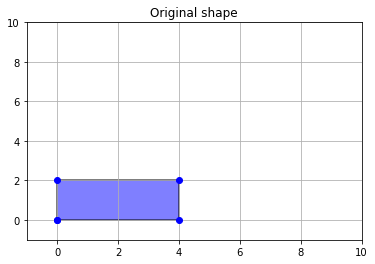

In [4]:
# Plot the orginal shape
plotTwoPolygons(X1 = X, plot_title = "Original shape")

### Transformations
Transformations will be Scaling, Rotation, and translation.

In [5]:
# An example of an affine transformation  
# Scaling transformation (explicit form)
S = np.array([[2.0, 0.0], 
             [0.0, 1.0]])
S

# Rotation
theta = np.pi/8.0 
R = np.array([[ np.cos(theta), -np.sin(theta)],
              [ np.sin(theta),  np.cos(theta)]])

# Translation part of the affine transformation
t = np.array([ [2],  
               [3] ] )

print("Scaling matrix =\n", S)
print("")
print("Rotation matrix =\n", R)
print("")
print("Translation vector =\n", t)

Scaling matrix =
 [[2. 0.]
 [0. 1.]]

Rotation matrix =
 [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]

Translation vector =
 [[2]
 [3]]


### Apply transformation to shape
The transformation that we will apply to the rectangle is a Rotation followed by a Scaling and then a Translation, i.e.: 

$$
\begin{align}
    {\bf x}^\prime = (SR)\,{\bf x} + {\bf t}
\end{align}
$$

In [6]:
Xp = (S @ R) @ X + t
print("Transformed points:")
Xp

Transformed points:


array([[2.        , 9.39103626, 7.86030253, 0.46926627, 2.        ],
       [3.        , 4.53073373, 6.37849279, 4.84775907, 3.        ]])

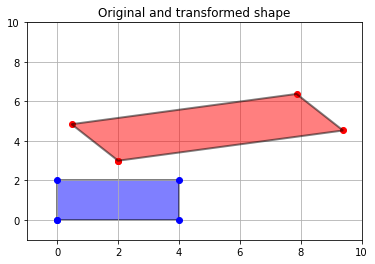

In [7]:
# Plot the original and the transformed shape
plotTwoPolygons(X1 = X, X2 = Xp, plot_title = "Original and transformed shape")

### Example using the inverse affine transformation

To see how the inclusion of the translation further complicates the matrix notation, let us calculate the inverse of the affine transformation in the previous equation. The inverse of ${\bf x}^\prime = (SR)\,{\bf x} + {\bf t}$ is:
$$
\begin{align}
{\bf x} &= (SR)^{-1}\left({\bf x}^\prime - {\bf t}\right) \\
        &= R^{-1}S^{-1}\left({\bf x}^\prime - {\bf t}\right) \\
        &= R^{-1}S^{-1}{\bf x}^\prime - R^{-1}S^{-1}{\bf t}. 
        \label{inverseT}
\end{align}
$$

With this inverse equation, we can go from the transformed shape back to the original shape. Let's do exactly that in the next example.

In [8]:
# Input shape is the transformed shape from the previous example
print("Shape to be transformed:")
Xp

Shape to be transformed:


array([[2.        , 9.39103626, 7.86030253, 0.46926627, 2.        ],
       [3.        , 4.53073373, 6.37849279, 4.84775907, 3.        ]])

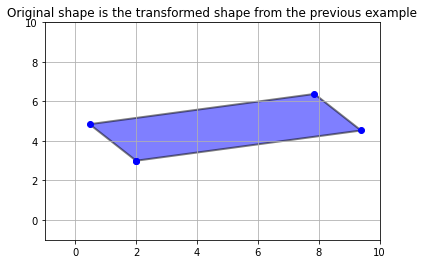

In [9]:
# This time, let's display the transformed shape in blue to indicate that it is our start shape, before transformation. 
plotTwoPolygons(X1 = Xp, plot_title = "Original shape is the transformed shape from the previous example")

In [10]:
# Calculate the shape produced by the inverse affine 
Xi = np.linalg.inv(R) @ np.linalg.inv(S) @ Xp - np.linalg.inv(R) @ np.linalg.inv(S) @ t 

# Transform this shape using the inverse affine matrix 
print('This is the shape resulting from the inverse affine transformation:\n')
print('Xi =\n', Xi)

This is the shape resulting from the inverse affine transformation:

Xi =
 [[0.0000000e+00 4.0000000e+00 4.0000000e+00 4.4408921e-16 0.0000000e+00]
 [0.0000000e+00 4.4408921e-16 2.0000000e+00 2.0000000e+00 0.0000000e+00]]


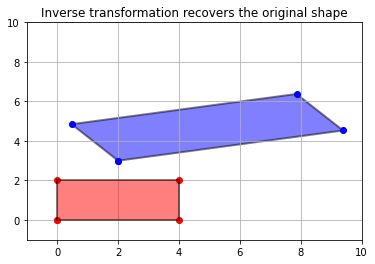

In [11]:
# Display both shapes (original and transformed)
plotTwoPolygons(X1 = Xp, X2 = Xi, plot_title = "Inverse transformation recovers the original shape")

### Coverting to homogeneous coordinates and representing transformations
The matrix notation of affine transformations can be made more concise by 
using *Homogeneous coordinates* instead of Cartesian coordinates. This is done 
by augmenting the Cartesian coordinates with an extra non-zero coordinate value, 
which is usually chosen to be 1, for simplicity.

To convert points from Cartesian to Homogeneous coordinates, 
we simply augment the original vector by adding 1 as an extra coordinate (i.e., 
dimension), i.e.: 

$$
\left[\begin{array}{c}		
    x \\		y 
\end{array}\right] 
\rightarrow\lambda\left[
\begin{array}{c}		
    x \\		y \\                1
\end{array}\right].
$$

While this new vector is in 3 dimensions, it is still a 2-D point. To convert homogenous coordinates back to Cartesian, we need only to divide 
the homogeneous coordinates as follows: 

$$\lambda\left[\begin{array}{c}		x \\		y \\                1\end{array}\right]\rightarrow\left[\begin{array}{c}		
x / \lambda\\		y / \lambda\end{array}\right]. $$

Because, we augmented the vectors, we must also augment the transformation 
matrices that will act on those vectors. 


### The affine transformation in homogeneous coordinates
Let us now repeat our previous examples of affine transformations  but this 
time using homogeneous coordinates instead of Cartesian. The 2-D affine transformation 
in homogeneous coordinates is given by: 

$\left[\begin{array}{c}		x^\prime \\		y^\prime \\                 1\end{array}\right] 
= \left[\begin{array}{c}		a_1 & a_2  & t_x\\		a_3 & a_4  & t_y\\                  
0  &   0    &   1\end{array}\right]\left[\begin{array}{c}    x \\        y \\    
1\end{array}\right]$.

This single matrix in homogeneous coordinates incorporates both the linear 
part of the affine and its translation. In homogeneous coordinates, the scaling 
matrix is: 

$S_h = \left[\begin{array}{c}		s_x & 0  &     0\\		0 & s_y  &  0\\                  
0  &   0    &   1\end{array}\right]$,

and the rotation is given by: 

$R_h= \left[\begin{array}{c}		\cos\theta & -\sin\theta & 0 \\		\sin\theta 
& \cos\theta & 0 \\		0 & 0 & 1 \end{array}\right]$.

Most importantly, we can now also represent the translation as a matrix, which 
is something that we could not do in Cartesian coordinates. The 2-D *translation 
matrix* is given by: 

$T_h = \left[\begin{array}{c}		1 & 0 & t_x \\		0 & 1 & t_y \\		0 & 0 & 1 \end{array}\right]$.

In homogeneous coordinates, we can write compositions and inverses of 
transformations more concisely than in Cartesian coordinates. For example, the transformation: 


$$
\begin{align}
	{\bf x}^\prime = SR\,{\bf x} + {\bf t},  
\end{align}
$$

can be written in homogeneous coordinates as:

$$
\begin{align}
	\tilde{\bf x}^\prime = T_hS_hR_h\,\tilde{\bf x}.
\end{align}
$$


Its inverse would be simply: 

$$
\begin{align}
 \tilde{\bf x}   &= \left(T_h\,S_h\,R_h\right)^{-1}\,\tilde{\bf x}^\prime \\
                 &= R_h^{-1}\,S_h^{-1}\,T_h^{-1}\,\tilde{\bf x}^\prime.
\end{align}
$$

In these equations, the subscript $h$ is being used to indicate the homogeneous 
version of the transformation. However, we do not usually explicitly differentiate 
the transformations.  

### Example

In [12]:
# An example of an affine transformation in homogeneous coordinates (using block notation of matrices). 
# I am re-using and augmenting the previous transformation matrices.

# Scaling
S_h = np.block([[S,                np.zeros((2, 1))],
                [np.zeros((1, 2)),                1]])
print('2-D Scaling in homogeneous coordinates:\n') 
print('S_h = ', np.array2string(S_h, prefix='Array: '))

# Rotation
R_h = np.block([[R,                np.zeros((2, 1))],
                [np.zeros((1, 2)),                1]])
print('\n2-D Rotation in homogeneous coordinates:\n') 
print('R_h = ', np.array2string(R_h, prefix='Array: '))

# Translation 
T_h = np.block([[np.eye(2,2),                     t],
                [np.zeros((1, 2)),                1]])
print('\n2-D Translation in homogeneous coordinates:\n') 
print('T_h = ', np.array2string(T_h, prefix='Array: '))




2-D Scaling in homogeneous coordinates:

S_h =  [[2. 0. 0.]
        [0. 1. 0.]
        [0. 0. 1.]]

2-D Rotation in homogeneous coordinates:

R_h =  [[ 0.92387953 -0.38268343  0.        ]
        [ 0.38268343  0.92387953  0.        ]
        [ 0.          0.          1.        ]]

2-D Translation in homogeneous coordinates:

T_h =  [[1. 0. 2.]
        [0. 1. 3.]
        [0. 0. 1.]]


### Shape to be transformed
Here, we will use the same shape(s) as in the previous examples. 

In [13]:
print("Input shape: \n")
print('X =', np.array2string(X, prefix='    '))

Input shape: 

X = [[0 4 4 0 0]
     [0 0 2 2 0]]


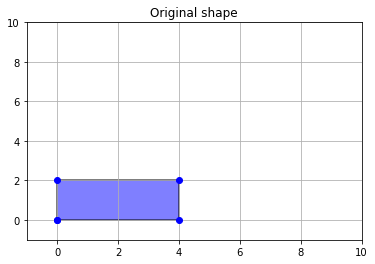

In [14]:
# Plot the orginal shape
plotTwoPolygons(X1 = X, plot_title = "Original shape")

We will then combine the transformations using matrix multiplication only to achieve the affine transformation, i.e.: 
$$
\begin{align}
	\tilde{\bf x}^\prime = T_hS_hR_h\,\tilde{\bf x}.
\end{align}
$$


Before we calculate the transformation, we need to convert the coordinates from Cartesian to homogeneous. As pointed out earlier,  
we add 1 as an extra coordinate. We choose $\lambda = 1$. 
$$
\left[\begin{array}{c}		
    x \\		y 
\end{array}\right] 
\rightarrow\lambda\left[
\begin{array}{c}		
    x \\		y \\                1
\end{array}\right].
$$


In [15]:
# Convert shape points from Cartesian to Homogeneous
ncols = X.shape[1]

X_h = np.block([[X],
               [np.ones((1, ncols))]])


print("Input shape (homogeneous coords): \n")
print('X_h =', np.array2string(X_h, prefix='      '))



Input shape (homogeneous coords): 

X_h = [[0. 4. 4. 0. 0.]
       [0. 0. 2. 2. 0.]
       [1. 1. 1. 1. 1.]]


In [16]:
# Affine transformation by combining transformations in homogeneous coordinates
Xp_h = T_h @ S_h @ R_h @ X_h

print("Transformed shape (homogeneous coords): \n")
print('Xp_h =', np.array2string(Xp_h, prefix='       '))

Transformed shape (homogeneous coords): 

Xp_h = [[2.         9.39103626 7.86030253 0.46926627 2.        ]
        [3.         4.53073373 6.37849279 4.84775907 3.        ]
        [1.         1.         1.         1.         1.        ]]


The calculations were done using homogeneous coordinates to represent the shape. The actual shape is represented in Cartesian coordinates. Thus, we must convert the shape back to Cartesian. 

To convert homogenous coordinates back to Cartesian, we need only to divide 
the homogeneous coordinates as follows: 

$$\lambda\left[\begin{array}{c}		x \\		y \\                1\end{array}\right]\rightarrow\left[\begin{array}{c}		
x / \lambda\\		y / \lambda\end{array}\right]. 
$$


In [17]:
# Convert shape representation from homogeneous to Cartesian (using vectorized calculation for speed and concise code)
Xp = Xp_h[0:2,:] / Xp_h[2,:]

print("Transformed shape (Cartesian coords): \n")
print('Xp =', np.array2string(Xp, prefix='     '))


Transformed shape (Cartesian coords): 

Xp = [[2.         9.39103626 7.86030253 0.46926627 2.        ]
      [3.         4.53073373 6.37849279 4.84775907 3.        ]]


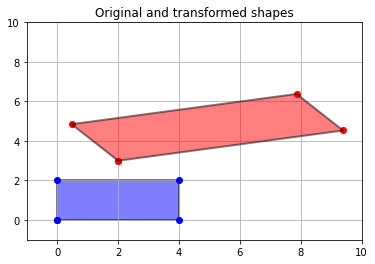

In [18]:
# Now, display the shape (Remember, we can only display the shape after we convert it to Cartesian coordinates)
plotTwoPolygons(X1 = X, X2 = Xp, plot_title = "Original and transformed shapes")

### Using the inverse in homogeneous coordinates 
The following example shows the use of the inverse transformation. This time, the notation is more concise because we will use homogeneous coordinates instead of Cartesian coordinates. 

Recall that the inverse of the transformation is:
$$
\begin{align}
 \tilde{\bf x}   &= \left(T_h\,S_h\,R_h\right)^{-1}\,\tilde{\bf x}^\prime \\
                 &= R_h^{-1}\,S_h^{-1}\,T_h^{-1}\,\tilde{\bf x}^\prime.
\end{align}
$$


In [19]:
# Using the inverse transformation to revert the "transformed" shape to its original shape
Xi_h = np.linalg.inv(R_h) @ np.linalg.inv(S_h) @ np.linalg.inv(T_h) @ Xp_h


# Transform this shape using the inverse affine matrix 
print('This is original shape calculated by the inverse transformation:\n')
print('Xi_h =', np.array2string(Xi_h, prefix='       ', precision=1))


This is original shape calculated by the inverse transformation:

Xi_h = [[0.0e+00 4.0e+00 4.0e+00 4.4e-16 0.0e+00]
        [0.0e+00 4.4e-16 2.0e+00 2.0e+00 0.0e+00]
        [1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00]]


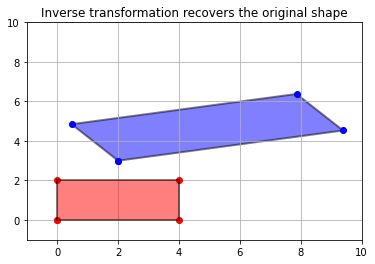

In [20]:
# Convert shape back to Cartesian coords and display both shapes
Xi_new = Xi_h[0:2,:] / Xi_h[2,:]
Xp_new = Xp_h[0:2,:] / Xp_h[2,:]


# Display both shapes (original and transformed)
plotTwoPolygons(X1 = Xp_new, X2 = Xi_new, plot_title = "Inverse transformation recovers the original shape")